# Clasificación Binaria

En este notebook se implementa una red neuronal para clasificar imágenes de acuerdo a su contenido en **roca**, si la imagen contiene una roca o **no roca** en caso contrario. Este es un tipo de clasificación binaria.

*Este notebook esta basado en un notebook de Andrew Ng del curso Deep Learning Specialization.* 

<img src="https://drive.google.com/uc?id=1f54NKWGUigTlKyyLgWMtsCkTj5RhQffk" align = "center" >



## 1 - Importar librerías 

Se importan las librerias a utilizar:
- [numpy](https://numpy.org/) es el paquete fundamental para la computación científica con Python.
- [matplotlib](http://matplotlib.org) es una biblioteca para trazar gráficos en Python.
- [h5py](http://www.h5py.org) es un paquete común para interactuar con un conjunto de datos que se almacena en un archivo H5.

- dnn_app_utils proporciona las funciones que se van a utilizar para la implementación de las redes neuronales.
- np.random.seed(1) se usa para mantener consistentes todas las llamadas a funciones aleatorias.

Vamos a usar el archivo dnn_app_utils_v3.py por lo que es necesario que montes tu drive para poder usar el archivo, para ello ejecuta la siguente celda, da permisos en tu cuenta y copia el código generado en la sección correspondiente. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Cambia a la ruta en donde se encuentra este notebook, la sintaxis general es:

**% cd [ruta]**

In [5]:
% cd /content/drive/Shareddrives/Curso IA Febrero 2021/Bloque2/Notebook

/content/drive/Shareddrives/Curso IA Febrero 2021/Bloque2/Notebook


In [6]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
np.random.seed(1)

## 2 - Análisis del conjunto de Datos


Los datos se encuentran en los archivos train_data.h5, test_data.h5. 

Cada archivo contiene dos conjuntos de datos:

- train_data.5
    
    - train_x: arreglo de (n_train, num_px, num_px, 3)
    
    - train_y: arreglo de (n_train,)
    

- test_data.5
    
    - test_x: arreglo de (n_test, num_px, num_px, 3)
    
    - test_y: arreglo de (n_test,)
    
    
donde 

- n_train: es el número de muestras para entrenar 
- n_test_ es el número de muestras para probar al modelo. 
- num_px: es el número de pixeles a lo largo y ancho de la imagen.

Los arreglos tipo x (train_x y test_x) contienen los arreglos que definen a las imágenes, mientras que los arreglos de tipo y (train_y y test_y) son las etiquetas y estas se indican con 0 si la imagen no es de una roca y 1 si la imagen es de una roca.


In [7]:
# Extraemos los datos que se encuentran en el archivo train_data.h5 y test_data.h5

# conjunto de entrenamiento
train_dataset = h5py.File('train_data.h5', "r")
train_x = train_dataset["train_x"][:] # arreglos que definen a las imágenes
train_y = train_dataset["train_y"][:] # etiquetas de las imágenes

#conjunto de prueba
test_dataset = h5py.File('test_data.h5', "r")
test_x = test_dataset["test_x"][:] # arreglos que definen a las imágenes
test_y = test_dataset["test_y"][:] # etiquetas de las imágenes



<img src="https://drive.google.com/uc?id=1FMVphTsr9WcN4rxo4VISry3P_RNSnOwI" align = "center" >

In [17]:
#train_x[0]
#train_y[0]

In [ ]:
# revisamos la forma de nuestros arreglos:
print('train_x shape:', train_x.shape)
print('train_y shape', train_y.shape)
print('test_x shape', test_x.shape)
print('test_y shape', test_y.shape)

train_x shape: (439, 64, 64, 3)
train_y shape (439,)
test_x shape (69, 64, 64, 3)
test_y shape (69,)


De aquí podemos concluir que se tienen n_train=439 muestras para entrenar al modelo y n_test=69 muestras para probarlo. Las imágenes tienen 64 pixeles de ancho, 64 pixeles de alto y estan en RGB (tienen tres canales: rojo, verde y azul).

## Observando una muestra del conjunto de entrenamiento:

Cada una de las muestras esta formada por un par (imagen, etiqueta), en donde la imagen se almacena como un arreglo tridimiensional de forma (64,64,3) indicando que la imagen es de 64 pixeles de ancho por 64 pixeles de largo y esta en RGB, es decir, tiene tres canales: rojo, verde y azul. Por otro lado, la etiqueta se denota con un dígito: 0 si no hay una roca en la imagen y 1 si hay una roca en la imagen.  

In [ ]:
#el siguiente diccionario nos permite relacionar la etiqueta 0 con no roca y el 1 con roca

dic = {0:'no roca', 1: 'roca'}

y = 0. (no roca)


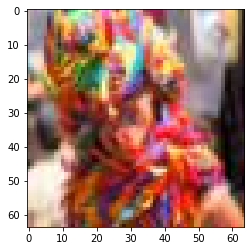

In [ ]:
# Ejemplo de una muestra de entrenamiento
index = 89
plt.imshow(train_x[index])
print ("y = " + str(train_y[index]) + ". (" + dic[train_y[index]] + ")")

In [ ]:
# cambiamos el shape de las etiquetas para que sean de la forma (1, n_train) y (1, n_test)

train_y = train_y.reshape(1, train_y.shape[0])
test_y = test_y.reshape(1, test_y.shape[0])

In [ ]:
# Revisamos la forma de cada arreglo
n_train = train_x.shape[0]
num_px = train_x.shape[1]
n_test = test_x.shape[0]

print ("Numero de muestras de entrenamiento: " + str(n_train))
print ("Numero de muestras de prueba: " + str(n_test))
print ("Cada imagen es de tamaño: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x shape: " + str(train_x.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x shape: " + str(test_x.shape))
print ("test_y shape: " + str(test_y.shape))

Numero de muestras de entrenamiento: 439
Numero de muestras de prueba: 69
Cada imagen es de tamaño: (64, 64, 3)
train_x shape: (439, 64, 64, 3)
train_y shape: (1, 439)
test_x shape: (69, 64, 64, 3)
test_y shape: (1, 69)


In [ ]:
# vectorizamos las muestras de entrada

train_x_flatten = train_x.reshape(train_x.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

print(train_x_flatten.shape)

# Normalizamos los datos para que cada pixel solo tome valores entre 0 y 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))


(12288, 439)
train_x's shape: (12288, 439)
test_x's shape: (12288, 69)


$12,288$ es igual a $64 \times 64 \times 3$ que es el número de entradas del vector resultante.

<img src="https://drive.google.com/uc?id=1069bhV9XdTHnB4FOANhjJd3V-YmYlIYO" align = "center" >

## 3 - Arquitectura del modelo

> ## Red neuronal con dos capas


<img src="https://drive.google.com/uc?id=1DtjUWnoORjjkDgP13y37W4jZ1npD6doI" align = "center" >

***INPUT -> Relu(LINEAR) -> sigmoid(LINEAR) -> OUTPUT***. 

- La entrada es una imagen de (64,64,3), la cual se vectoriza para que sea de tamaño (64x64x3, 1)=(12288,1)
- Cada pixel que define a la imagen es una entrada del vector  $[x_0,x_1,...,x_{12287}]^T$
- Se hace el producto entre el vector de caragterísticas ( $[x_0,x_1,...,x_{12287}]^T$) con la matriz $W^{[1]}$
* la matriz $W^{[1]}$ tiene forma  $(n^{[1]}, 12288)$.
- Al producto anterior se le suma el bias, para obtener $z=wx+b$.
- Se aplica la función de activación relu a cada una de las entradas de $z$ para obtener $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.

Se repite el proceso anterior tomando a $a^{[1]}$ como $x$

- Se multiplica  $a^{[1]}$ por la matriz  $W^{[2]}$ y se suma el bias de esa capa.
- Se aplica la función sigmoide al resultado anterior, $z^{[2]}$. 
- Para obtener el output se considera que el resultado es 1 si $\sigma(z^{[2]})>0.5$ y 0 en otro caso.


> ##  Red Neuronal con L capas


- La entrada es una imagen de (64,64,3), la cual se vectoriza para que sea de tamaño (64x64x3, 1)=(12288,1)
- Cada pixel que define a la imagen es una entrada del vector  $[x_0,x_1,...,x_{12287}]^T$
- Se hace el producto entre el vector de caragterísticas ( $[x_0,x_1,...,x_{12287}]^T$) con la matriz $W^{[1]}$
* la matriz $W^{[1]}$ tiene forma  $(n^{[1]}, 12288)$.
- Al producto anterior se le suma el bias, para obtener $z=wx+b$.
- Se aplica la función de activación relu a cada una de las entradas de $z$ para obtener $[a_0^{[1]}, a_1^{[1]},..., a_{n^{[1]}-1}^{[1]}]^T$.
- Este proceso se repite L-1 veces para cada  $(W^{[l]}, b^{[l]})$.
- Se aplica la función sigmoide al resultado anterior, $z^{[L-1]}$. 
- Para obtener el output se considera que el resultado es 1 si $\sigma(z^{[L-1]})>0.5$ y 0 en otro caso.

## - Metodología


     1. Inicializar parámetros / Definir hiperparámetros
     2. Bucle para num_iteraciones:
         a. Propagación hacia adelante
         b. Función de cálculo de costos
         c. Propagación hacia atrás
         d. Actualizar parámetros (usando parámetros y graduaciones de backprop)
     4. Utilice parámetros entrenados para predecir etiquetas



## 4 - Red Neuronal con dos capas
 
 Las funciones que vas a usar son:

```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [ ]:
n_x = 12288    # numero de rasgos o características
n_h = 7       # numero de nodos en la capa 1
n_y = 1       # numero de nodos en la capa de salida
layers_dims = (n_x, n_h, n_y)

In [ ]:
def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    INPUT 
    X -- train_x (n_x, number of examples)
    Y -- train_y (1, number of examples)
    layers_dims -- tupla que contiene el numero de nodos por capa (n_x, n_h, n_y)
    num_iterations -- numero de iteraciones
    learning_rate -- tasa de aprendizaje
    print_cost -- imprime el costo cada 100 iteraciones 
    
    OUTPUT
    parameters -- diccionario que contiene a los parametros W1,b1,W2,b2
    """
    
    np.random.seed(1) # se fija una semilla para obtener resultados reproducibles
    grads = {} # se inicializa el diccionario grads
    costs = [] # se inicializa la lista costs                      
    m = X.shape[1]      # numero de muestras para entrenar                 
    (n_x, n_h, n_y) = layers_dims # se extrae el numero de nodos por cada capa
    
    # Se inicializa el diccionario parameters llamando a la funcion initialize_parameters en dnn_app_utils_v3
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Se extrae W1, b1, W2 y b2 del diccionario parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # iteraciones para el algoritmo de gradien descent (GD)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. 
        #Inputs: "X, W1, b1, W2, b2". 
        #Output: "A1, cache1, A2, cache2".
        A1, cache1 = linear_activation_forward(X, W1, b1, "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, "sigmoid")
        
        # Calculo del costo usando la función compute_cost de dnn_app_utils_v3
        cost = compute_cost(A2, Y)
        
        # Se inicializa el backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. 
        #Inputs: "dA2, cache2, cache1".
        #Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, "relu")
        
        # Se guardan los gradientes calculados en el diccionario grads
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Se actualizan los parametros
        parameters = update_parameters(parameters, grads, learning_rate)

        # Se recuperan los parametros W1, b1, W2, b2 del diccionario parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Se imprime el costo cada 100 iteraciones
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # se grafica el costo en función de la iteracion
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

La siguiente celda llama a la función two_layer_model la cual permite entrenar a las red neuronal implementada.

Cost after iteration 0: 0.6931501373116659
Cost after iteration 100: 0.6931491543814984
Cost after iteration 200: 0.693148241028334
Cost after iteration 300: 0.6931474424541734
Cost after iteration 400: 0.6931468359008638
Cost after iteration 500: 0.6931463872822338
Cost after iteration 600: 0.6931460102038016
Cost after iteration 700: 0.6931456709218577
Cost after iteration 800: 0.6931453644435
Cost after iteration 900: 0.6931450878400822
Cost after iteration 1000: 0.6931448284925369
Cost after iteration 1100: 0.6931445774924233
Cost after iteration 1200: 0.6931443319451123
Cost after iteration 1300: 0.6931440897089616
Cost after iteration 1400: 0.693143849896419
Cost after iteration 1500: 0.6931436138952605
Cost after iteration 1600: 0.6931433786931906
Cost after iteration 1700: 0.6931431439249719
Cost after iteration 1800: 0.6931429094945508
Cost after iteration 1900: 0.6931426744095935
Cost after iteration 2000: 0.6931424386692386
Cost after iteration 2100: 0.6931422021685782
Cost 

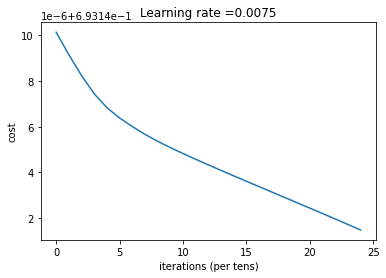

In [ ]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

Ahora, puede usar los parámetros entrenados para clasificar imágenes del conjunto de datos. Para ver sus predicciones sobre los conjuntos de entrenamiento y prueba, ejecute la celda a continuación.

In [ ]:
predictions_train = predict(train_x, train_y, parameters)

Accuracy: 0.501138952164009


In [ ]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.6956521739130431


## 5 - L-layer Neural Network

Las funciones que puede necesitar y sus entradas son:



```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [ ]:
layers_dims = [12288, 20, 7, 5, 1] #  red neuronal con 4 capas

In [ ]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implementa una red neuronal con L capas: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    INPUT 
    X -- train_x (n_x, number of examples)
    Y -- train_y (1, number of examples)
    layers_dims -- tupla que contiene el numero de nodos por capa (n_x, n_h, n_y)
    num_iterations -- numero de iteraciones
    learning_rate -- tasa de aprendizaje
    print_cost -- imprime el costo cada 100 iteraciones 
    
    OUTPUT
    parameters -- diccionario que contiene a los parametros W1,b1,W2,b2
    """

    np.random.seed(1)
    costs = []                        

    parameters = initialize_parameters_deep(layers_dims)

    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation.
        grads = L_model_backward(AL, Y, caches)
      
        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)
                
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Ejecute la celda a continuación para entrenar su modelo. 

Cost after iteration 0: 0.693350
Cost after iteration 100: 0.692678
Cost after iteration 200: 0.692435
Cost after iteration 300: 0.692155
Cost after iteration 400: 0.691821
Cost after iteration 500: 0.691470
Cost after iteration 600: 0.691113
Cost after iteration 700: 0.690750
Cost after iteration 800: 0.690381
Cost after iteration 900: 0.689998
Cost after iteration 1000: 0.689607
Cost after iteration 1100: 0.689202
Cost after iteration 1200: 0.688785
Cost after iteration 1300: 0.688351
Cost after iteration 1400: 0.687901
Cost after iteration 1500: 0.687431
Cost after iteration 1600: 0.686940
Cost after iteration 1700: 0.686425
Cost after iteration 1800: 0.685884
Cost after iteration 1900: 0.685314
Cost after iteration 2000: 0.684711
Cost after iteration 2100: 0.684074
Cost after iteration 2200: 0.683398
Cost after iteration 2300: 0.682679
Cost after iteration 2400: 0.681912


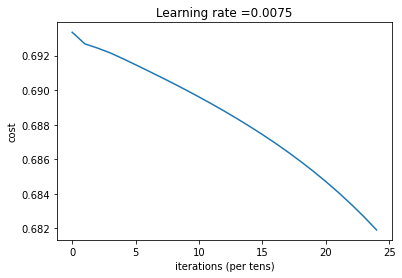

In [ ]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

In [ ]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.6810933940774488


In [ ]:
pred_test = predict(test_x, test_y, parameters)

Accuracy: 0.7971014492753621
